Given n points in a d-dimensional space, the goal of hierarchical clustering is to create a sequence of nested partitions, which can be conveniently visualized via a dendogram. Agglomerative clustering is a hierarchical clustering technique where we begin with each of the n data points in a separate
cluster and repeatedly merge the two closest clusters until all points are members of the same cluster
accompanied with a stopping criteria.

(a) (1+1+1 points) Agglomerative clustering belongs to one of the two main categories of hierar-
chical clustering. Name the categories and provide the reason for wide usage of one category over

the other.
(b) The main step in agglomerative clustering is to determine the closest pair of clusters. Computing cluster distances ultimately translates to computing distance between two points which is generally taken to be Euclidean distance. But there are different measures that are generally employed for representing the cluster distance, known as linkage.

**DONE**

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

! cp drive/MyDrive/DMG/Assignment3/Mall_Customers.csv .
! cp drive/MyDrive/DMG/Assignment3/wine.data .
! cp drive/MyDrive/DMG/Assignment3/Iris.csv .

Mounted at /content/drive


Run agglomerative clustering using the following linkages {single, complete, group average, minimum variance}. Compare the clustering performance both visually and empirically on the 3 datasets. Report the best results.


In [ ]:
# First we are doing with the wine dataset
import pandas as pd
data = pd.read_csv("wine.data")

data

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
173,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
174,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
175,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np
normalizer = StandardScaler()
data_x = np.array(data.loc[:,data.columns != "1"])
data_y = np.array(data.loc[:,data.columns == "1"])
data_y = [x[0] for x in data_y]
data_array = np.array(data_x)
normalizer.fit(data_array)
data_normalized = normalizer.transform(data_array)

In [ ]:
from scipy.stats import entropy
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import random

def bootstrap_func(data_arr):
  new_arr = []
  length = len(data_arr)
  for i in range(length):
    index = random.randrange(0, length, 1)
    new_arr.append(data_arr[index])
  new_arr = np.array(new_arr)
  return new_arr

def cluster_func_visualization(data_normalized,labels):
  tsne = TSNE(n_components=2)
  X_tsne = tsne.fit_transform(data_normalized)
  plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels)


def intrinsic(ground_truth, labels):
  a = len(np.unique(ground_truth))
  b = len(np.unique(labels))
  factor = 1
  if(a > b):
    factor = b/a
  purity = []
  entropy_list = []
  prob_arr = []
  count = 0
  count_dict = {}
  previous_val = ground_truth[0]
  for i in range(len(ground_truth)):
    if(previous_val != ground_truth[i]):
      max_count = 0
      for label in count_dict:
        prob_arr.append(count_dict[label]/count)
        if(count_dict[label] > max_count):
          max_count = count_dict[label]
      purity.append(max_count/count * factor)
      entropy_list.append(entropy(prob_arr,base=2))
      count_dict = {}
      previous_val = ground_truth[i]
      count = 0
      prob_arr = []
    count+=1
    if labels[i] in count_dict:
      count_dict[labels[i]] +=1
    else:
      count_dict[labels[i]] = 1
  if(previous_val!= None):
    max_count = 0
    for label in count_dict:
      if(count_dict[label] > max_count):
        prob_arr.append(count_dict[label]/count)
        max_count = count_dict[label]
    purity.append(max_count/count * factor)
    entropy_list.append(entropy(prob_arr,base=2))
    count_dict = {}
  print("Cluster purities are {}".format(purity))
  print("Entropies of clusters are {}".format(entropy_list))



def cluster_evaluation(data,c_labels,ground_truth):
  print("Silhouette Coefficient is {}".format(silhouette_score(data, c_labels)))
  print("Davies Bouldin index is {}".format(davies_bouldin_score(data, c_labels)))
  intrinsic(ground_truth,c_labels)

In [ ]:
# Single

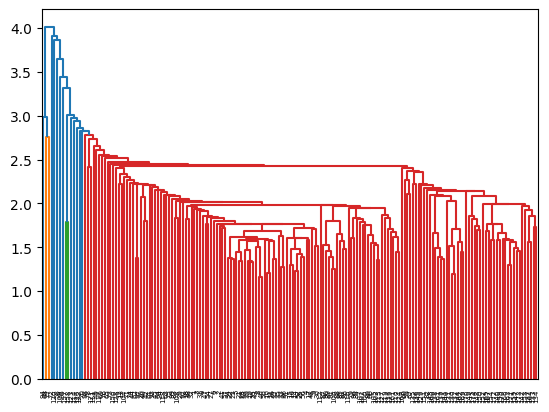

Silhouette Coefficient is 0.18584684069789328
Davies Bouldin index is 0.9053187149698432
Cluster purities are [1.0, 0.9436619718309859, 1.0]
Entropies of clusters are [0.0, 0.3584391862253269, 0.0]


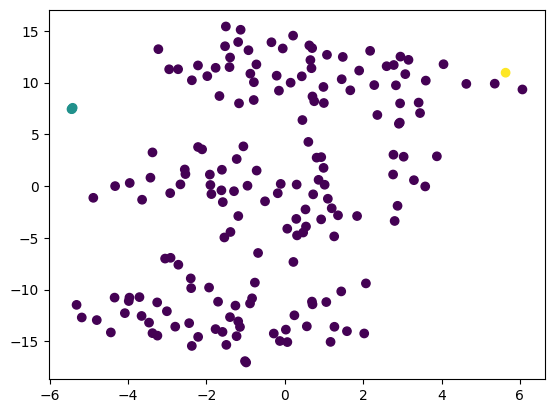

In [ ]:
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
linkage_obj = hierarchy.linkage(data_normalized, method='single')
hierarchy.dendrogram(linkage_obj)
plt.show()
hierarchical_clustering = AgglomerativeClustering(n_clusters=3,linkage='single')
labels = hierarchical_clustering.fit_predict(data_normalized)
cluster_func_visualization(data_normalized,labels)
cluster_evaluation(data_normalized,labels,data_y)

In [ ]:
# Complete

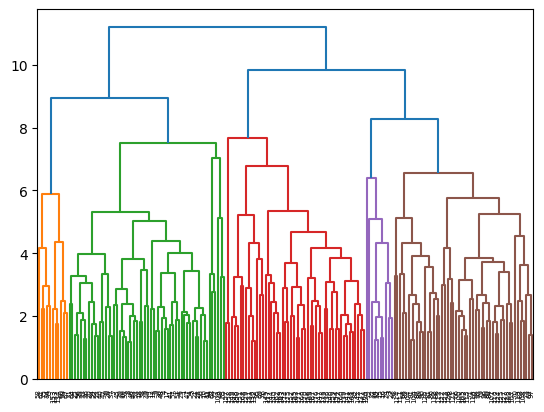

Silhouette Coefficient is 0.20028718167300175
Davies Bouldin index is 1.863452266172262
Cluster purities are [0.8620689655172413, 0.7323943661971831, 0.9375]
Entropies of clusters are [0.5787946246321198, 1.060515081102146, 0.0]


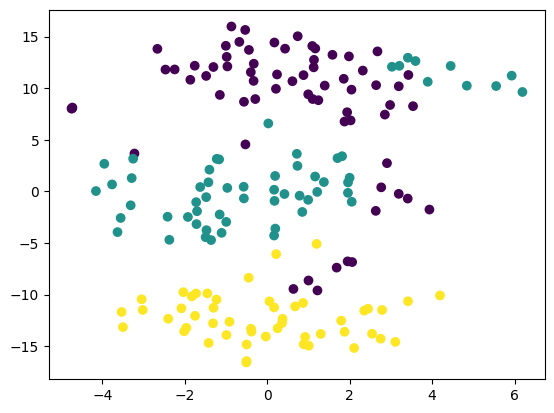

In [ ]:
linkage_obj = hierarchy.linkage(data_normalized, method='complete')
hierarchy.dendrogram(linkage_obj)
plt.show()
hierarchical_clustering = AgglomerativeClustering(n_clusters=3,linkage='complete')
labels = hierarchical_clustering.fit_predict(data_normalized)
cluster_func_visualization(data_normalized,labels)
cluster_evaluation(data_normalized,labels,data_y)

In [ ]:
# Average

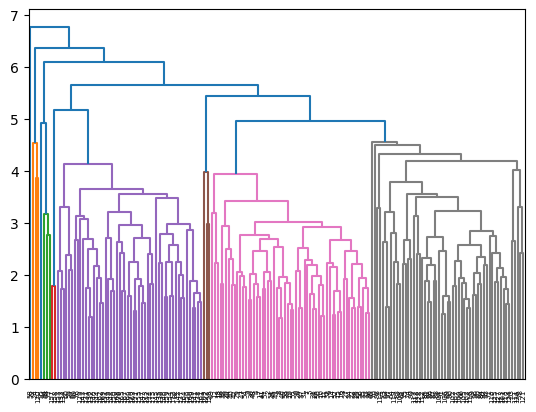

Silhouette Coefficient is 0.15802505775764714
Davies Bouldin index is 1.0275729400971245
Cluster purities are [0.9827586206896551, 0.9577464788732394, 1.0]
Entropies of clusters are [0.1256580501725674, 0.2913320039409767, 0.0]


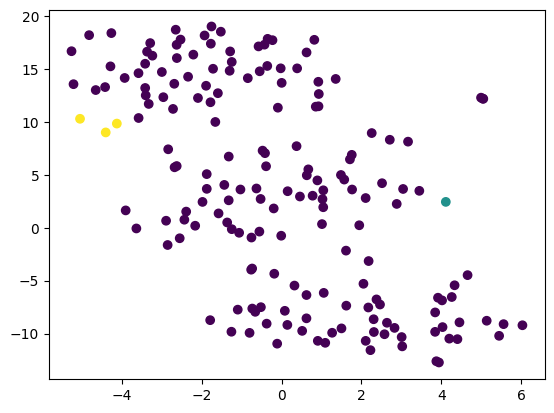

In [ ]:
linkage_obj = hierarchy.linkage(data_normalized, method='average')
hierarchy.dendrogram(linkage_obj)
plt.show()
hierarchical_clustering = AgglomerativeClustering(n_clusters=3,linkage='average')
labels = hierarchical_clustering.fit_predict(data_normalized)
cluster_func_visualization(data_normalized,labels)
cluster_evaluation(data_normalized,labels,data_y)

In [ ]:
# Minimum Variance

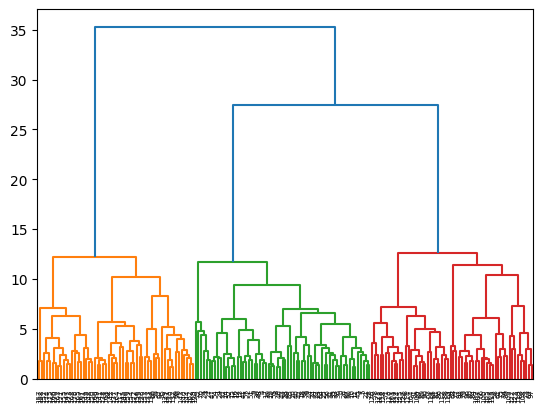

Silhouette Coefficient is 0.27631805856826086
Davies Bouldin index is 1.423049605772363
Cluster purities are [1.0, 0.8169014084507042, 1.0]
Entropies of clusters are [0.0, 0.8628099618731891, 0.0]


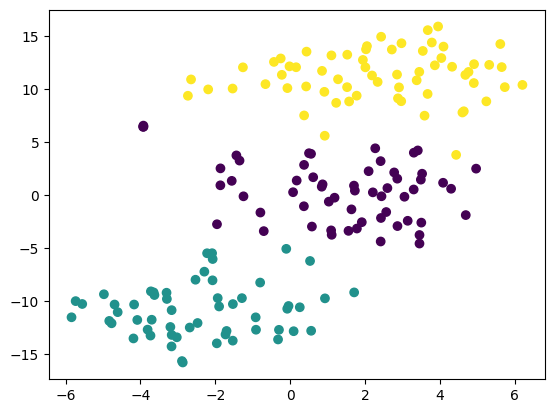

In [ ]:
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering

linkage_obj = hierarchy.linkage(data_normalized, method='ward')
hierarchy.dendrogram(linkage_obj)
plt.show()
hierarchical_clustering = AgglomerativeClustering(n_clusters=3,linkage='ward')
labels = hierarchical_clustering.fit_predict(data_normalized)
cluster_func_visualization(data_normalized,labels)
cluster_evaluation(data_normalized,labels,data_y)

In [ ]:
# Now we will do it with the iris dataset
import pandas as pd
data = pd.read_csv("Iris.csv")
data["Species"] = data["Species"].apply(lambda x: 0 if x=='Iris-setosa'else
                                           2 if x == "Iris-virginica" else 1 )

In [ ]:
from sklearn.preprocessing import StandardScaler
normalizer = StandardScaler()
data_x = np.array(data.loc[:,data.columns != "Species"])
data_y = np.array(data.loc[:,data.columns == "Species"])
data_y = [x[0] for x in data_y]
data_array = np.array(data_x)
normalizer.fit(data_array)
data_normalized = normalizer.transform(data_array)

In [ ]:
#Single

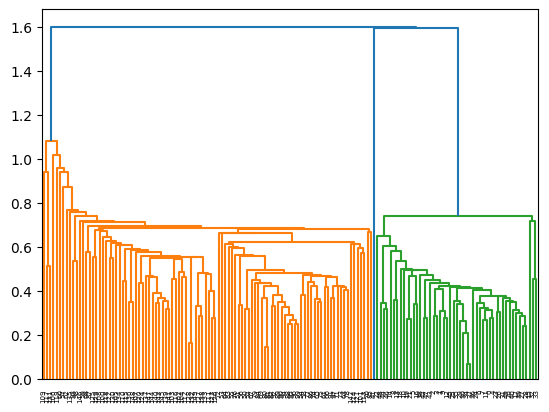

Silhouette Coefficient is 0.4784399371880524
Davies Bouldin index is 0.5120749374629816
Cluster purities are [0.98, 1.0, 1.0]
Entropies of clusters are [0.14144054254182067, 0.0, 0.0]


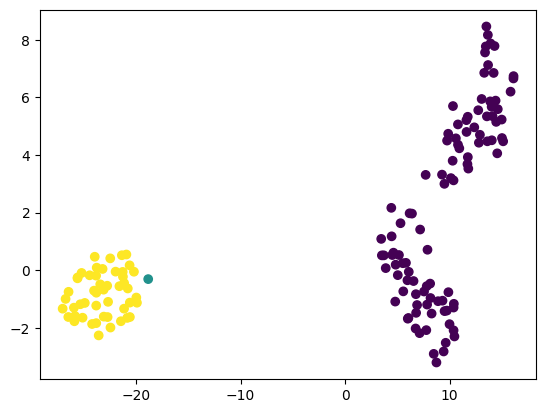

In [ ]:
linkage_obj = hierarchy.linkage(data_normalized, method='single')
hierarchy.dendrogram(linkage_obj)
plt.show()
hierarchical_clustering = AgglomerativeClustering(n_clusters=3,linkage='single')
labels = hierarchical_clustering.fit_predict(data_normalized)
cluster_func_visualization(data_normalized,labels)
cluster_evaluation(data_normalized,labels,data_y)
# print("Silhouette Coefficient is {}".format(silhouette_score(data_normalized, labels)))
# print("Davies Bouldin index is {}".format(davies_bouldin_score(data_normalized, labels)))

In [ ]:
# Complete

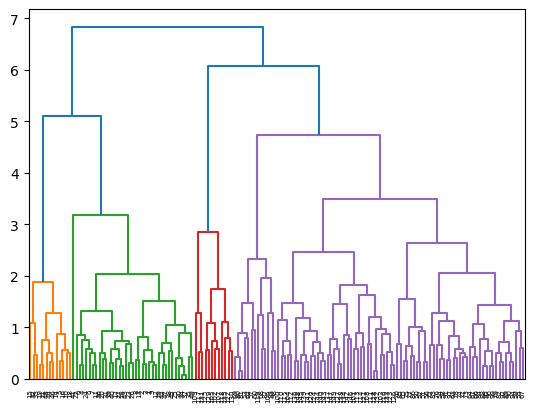

Silhouette Coefficient is 0.40583021522665685
Davies Bouldin index is 0.8902085129157152
Cluster purities are [1.0, 1.0, 0.76]
Entropies of clusters are [0.0, 0.0, 0.0]


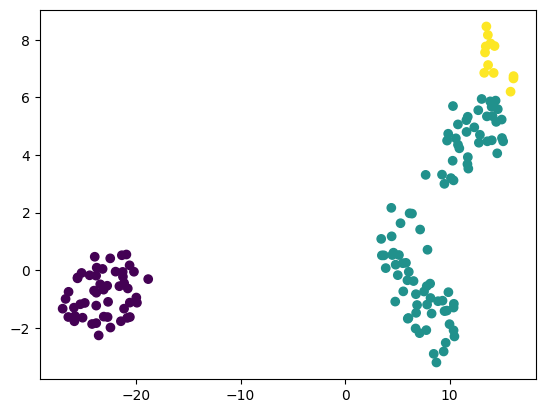

In [ ]:
linkage_obj = hierarchy.linkage(data_normalized, method='complete')
hierarchy.dendrogram(linkage_obj)
plt.show()
hierarchical_clustering = AgglomerativeClustering(n_clusters=3,linkage='complete')
labels = hierarchical_clustering.fit_predict(data_normalized)
cluster_func_visualization(data_normalized,labels)
cluster_evaluation(data_normalized,labels,data_y)
# print("Silhouette Coefficient is {}".format(silhouette_score(data_normalized, labels)))
# print("Davies Bouldin index is {}".format(davies_bouldin_score(data_normalized, labels)))

In [ ]:
# Average

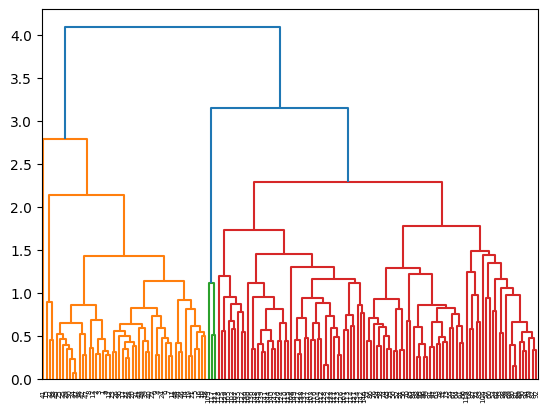

Silhouette Coefficient is 0.44330017257110443
Davies Bouldin index is 0.6217573553714415
Cluster purities are [1.0, 1.0, 0.94]
Entropies of clusters are [0.0, 0.0, 0.0]


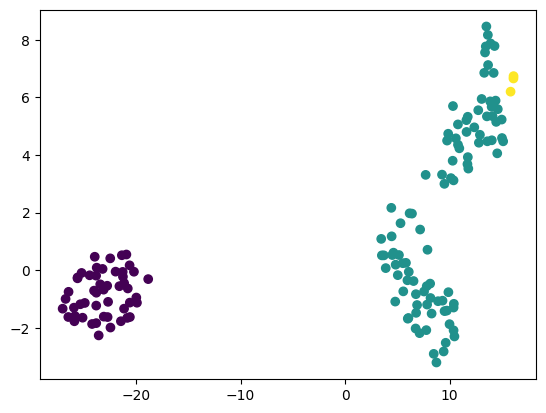

In [ ]:
linkage_obj = hierarchy.linkage(data_normalized, method='average')
hierarchy.dendrogram(linkage_obj)
plt.show()
hierarchical_clustering = AgglomerativeClustering(n_clusters=3,linkage='average')
labels = hierarchical_clustering.fit_predict(data_normalized)
cluster_func_visualization(data_normalized,labels)
cluster_evaluation(data_normalized,labels,data_y)

# print("Silhouette Coefficient is {}".format(silhouette_score(data_normalized, labels)))
# print("Davies Bouldin index is {}".format(davies_bouldin_score(data_normalized, labels)))

In [ ]:
# Minimum Variance

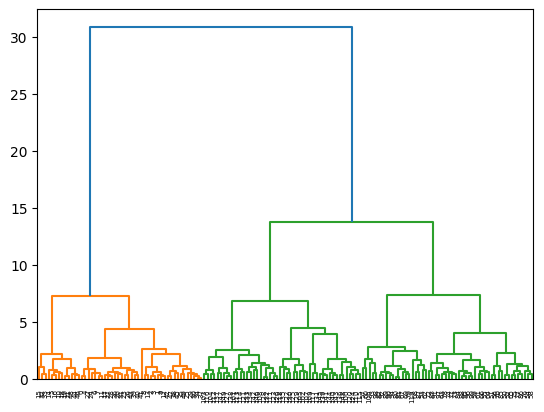

Silhouette Coefficient is 0.45183200660097467
Davies Bouldin index is 0.9116946470792376
Cluster purities are [1.0, 1.0, 0.96]
Entropies of clusters are [0.0, 0.0, 0.0]


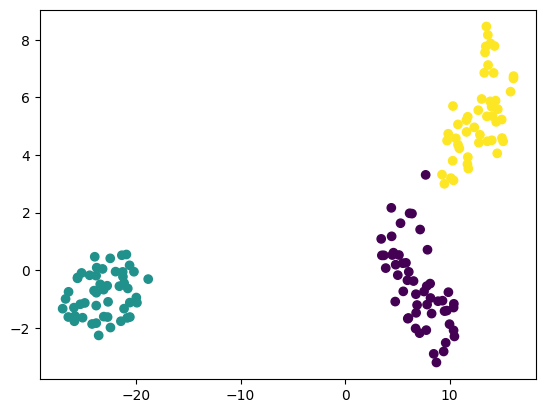

In [ ]:
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering

linkage_obj = hierarchy.linkage(data_normalized, method='ward')
hierarchy.dendrogram(linkage_obj)
plt.show()
hierarchical_clustering = AgglomerativeClustering(n_clusters=3,linkage='ward')
labels = hierarchical_clustering.fit_predict(data_normalized)
cluster_func_visualization(data_normalized,labels)
cluster_evaluation(data_normalized,labels,data_y)

In [ ]:
# Now we will do with the Mall Customers dataset

import pandas as pd
data = pd.read_csv("Mall_Customers.csv")
data = data.drop(["CustomerID"], axis = 1)

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
data_array = data[["Annual Income (k$)","Spending Score (1-100)"]]
normalizer = StandardScaler()
normalizer.fit(data_array)
data_normalized = data_array

In [ ]:
#Single

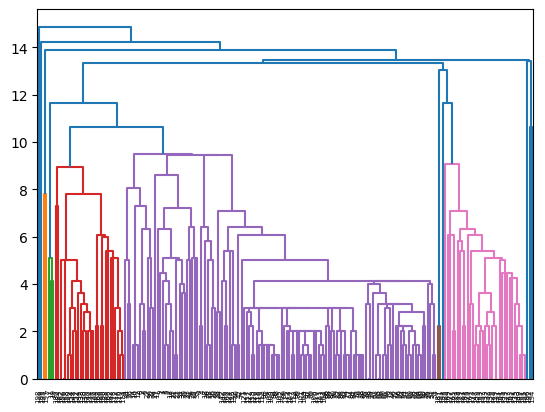

Silhouette Coefficient is 0.365677402459876
Davies Bouldin index is 0.3646616939688934
Cluster purities are [1.0, 1.0, 1.0]
Entropies of clusters are [0.0, 0.0, 0.0]


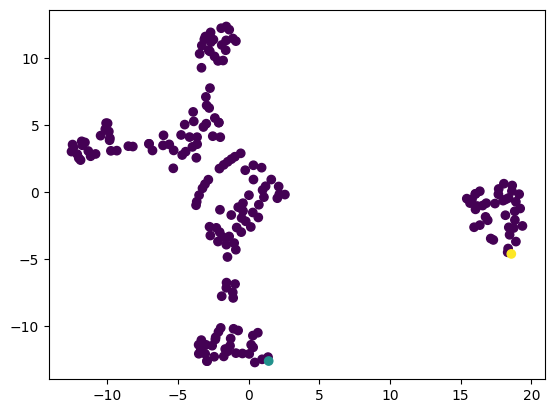

In [ ]:
linkage_obj = hierarchy.linkage(data_normalized, method='single')
hierarchy.dendrogram(linkage_obj)
plt.show()
hierarchical_clustering = AgglomerativeClustering(n_clusters=3,linkage='single')
labels = hierarchical_clustering.fit_predict(data_normalized)
cluster_func_visualization(data_normalized,labels)
cluster_evaluation(data_normalized,labels,data_y)

# print("Silhouette Coefficient is {}".format(silhouette_score(data_normalized, labels)))
# print("Davies Bouldin index is {}".format(davies_bouldin_score(data_normalized, labels)))

In [ ]:
# Complete

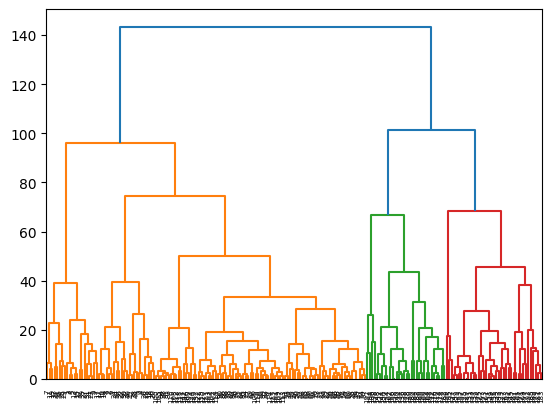

Silhouette Coefficient is 0.4618340266628975
Davies Bouldin index is 0.7068435076376502
Cluster purities are [1.0, 1.0, 0.56]
Entropies of clusters are [0.0, 0.0, 0.0]


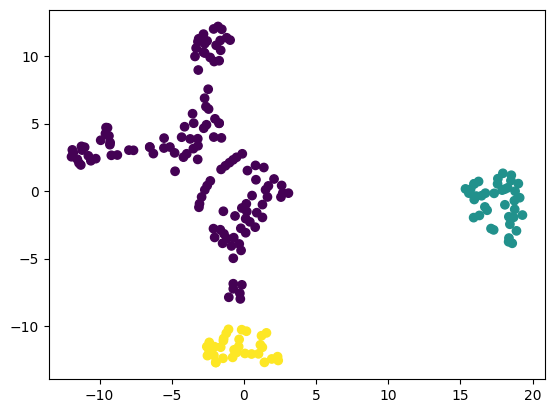

In [ ]:
linkage_obj = hierarchy.linkage(data_normalized, method='complete')
hierarchy.dendrogram(linkage_obj)
plt.show()
hierarchical_clustering = AgglomerativeClustering(n_clusters=3,linkage='complete')
labels = hierarchical_clustering.fit_predict(data_normalized)
cluster_func_visualization(data_normalized,labels)
cluster_evaluation(data_normalized,labels,data_y)

# print("Silhouette Coefficient is {}".format(silhouette_score(data_normalized, labels)))
# print("Davies Bouldin index is {}".format(davies_bouldin_score(data_normalized, labels)))

In [ ]:
# Average

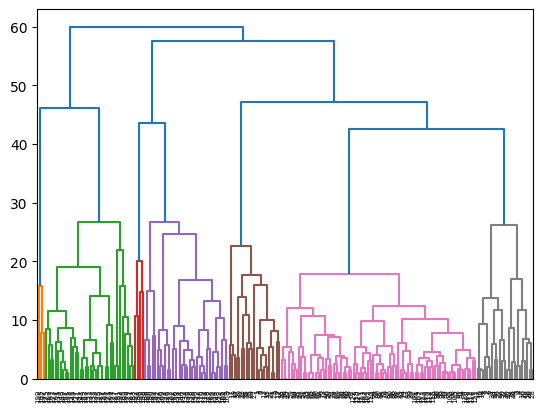

Silhouette Coefficient is 0.46761358158775435
Davies Bouldin index is 0.715276820248462
Cluster purities are [1.0, 1.0, 0.46]
Entropies of clusters are [0.0, 0.0, 0.0]


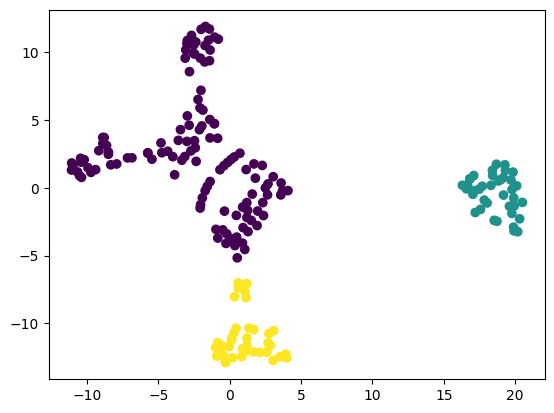

In [ ]:
linkage_obj = hierarchy.linkage(data_normalized, method='average')
hierarchy.dendrogram(linkage_obj)
plt.show()
hierarchical_clustering = AgglomerativeClustering(n_clusters=3,linkage='average')
labels = hierarchical_clustering.fit_predict(data_normalized)
cluster_func_visualization(data_normalized,labels)
cluster_evaluation(data_normalized,labels,data_y)

# print("Silhouette Coefficient is {}".format(silhouette_score(data_normalized, labels)))
# print("Davies Bouldin index is {}".format(davies_bouldin_score(data_normalized, labels)))

In [ ]:
# Minimum Variance

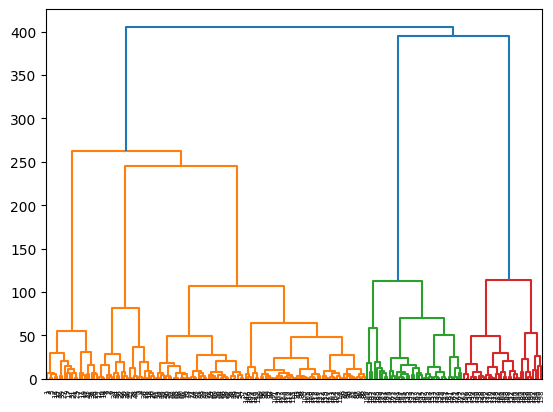

Silhouette Coefficient is 0.4618340266628975
Davies Bouldin index is 0.7068435076376502
Cluster purities are [1.0, 1.0, 0.56]
Entropies of clusters are [0.0, 0.0, 0.0]


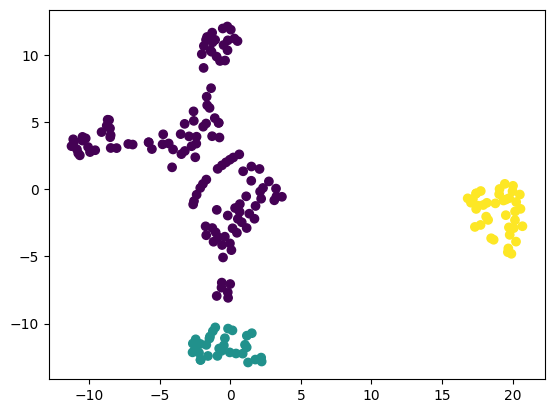

In [ ]:
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering

linkage_obj = hierarchy.linkage(data_normalized, method='ward')
hierarchy.dendrogram(linkage_obj)
plt.show()
hierarchical_clustering = AgglomerativeClustering(n_clusters=3,linkage='ward')
labels = hierarchical_clustering.fit_predict(data_normalized)
cluster_func_visualization(data_normalized,labels)
cluster_evaluation(data_normalized,labels,data_y)


In [ ]:
# The below code is for bootstrapping. here we are doing the 5th part of the question, which is,

(e) (5+5+5 points) It is a wise practice to check whether the results obtained after clustering are
valid, i.e., they are significantly different from random data. You need to come up with a suitable
way to confirm it for all the 3 datasets.


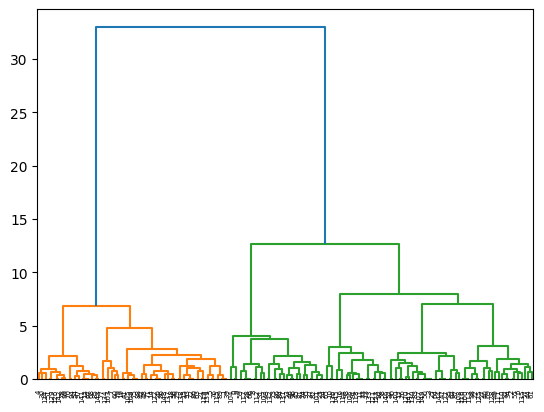

Silhouette Coefficient is 0.4801097641776329
Davies Bouldin index is 0.8403704618156261
Cluster purities are [0.42, 0.46, 0.52]
Entropies of clusters are [1.5368349155882077, 1.5219427338882936, 0.0]


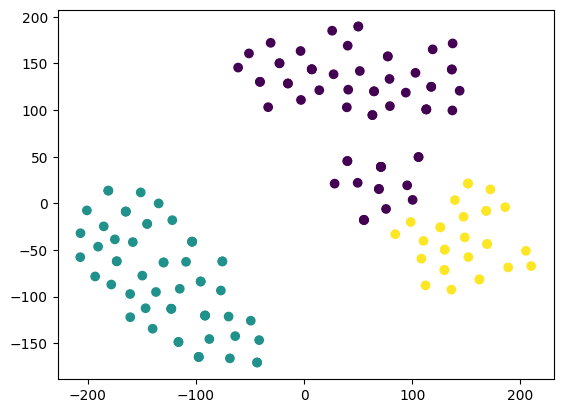

In [ ]:
# For iris data
import pandas as pd
data = pd.read_csv("Iris.csv")
data["Species"] = data["Species"].apply(lambda x: 0 if x=='Iris-setosa'else
                                           2 if x == "Iris-virginica" else 1 )

from sklearn.preprocessing import StandardScaler
normalizer = StandardScaler()
data_x = np.array(data.loc[:,data.columns != "Species"])
data_y = np.array(data.loc[:,data.columns == "Species"])
data_y = [x[0] for x in data_y]
data_array = np.array(data_x)
normalizer.fit(data_array)
data_normalized = normalizer.transform(data_array)

new_data = bootstrap_func(data_normalized)
linkage_obj = hierarchy.linkage(new_data, method='ward')
hierarchy.dendrogram(linkage_obj)
plt.show()
hierarchical_clustering = AgglomerativeClustering(n_clusters=3,linkage='ward')
labels = hierarchical_clustering.fit_predict(new_data)
cluster_func_visualization(new_data,labels)
cluster_evaluation(new_data,labels,data_y)

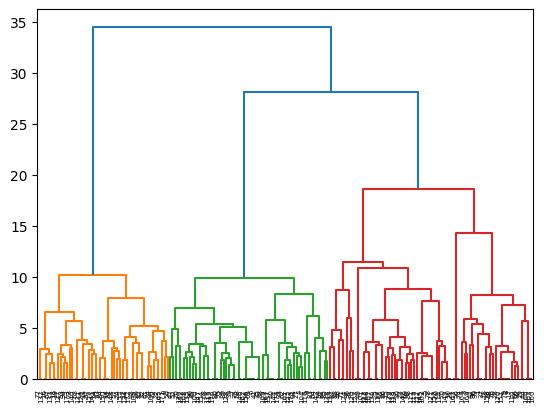

Silhouette Coefficient is 0.2786744521775394
Davies Bouldin index is 1.4204281064676998
Cluster purities are [0.41379310344827586, 0.4507042253521127, 0.3541666666666667]
Entropies of clusters are [1.5631922012781003, 1.5209800920196748, 0.0]


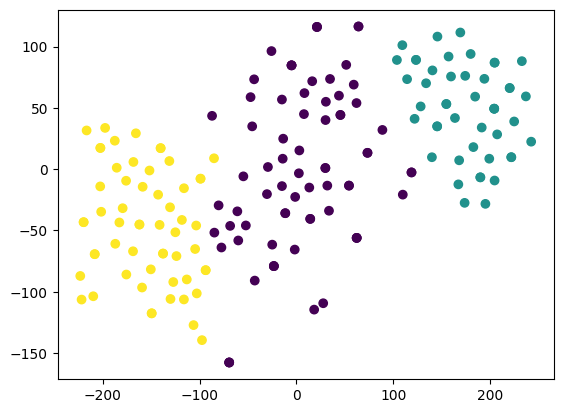

In [ ]:
# For wine data
import pandas as pd
data = pd.read_csv("wine.data")

from sklearn.preprocessing import StandardScaler
import numpy as np
normalizer = StandardScaler()
data_x = np.array(data.loc[:,data.columns != "1"])
data_y = np.array(data.loc[:,data.columns == "1"])
data_y = [x[0] for x in data_y]
data_array = np.array(data_x)
normalizer.fit(data_array)
data_normalized = normalizer.transform(data_array)

new_data = bootstrap_func(data_normalized)
linkage_obj = hierarchy.linkage(new_data, method='ward')
hierarchy.dendrogram(linkage_obj)
plt.show()
hierarchical_clustering = AgglomerativeClustering(n_clusters=3,linkage='ward')
labels = hierarchical_clustering.fit_predict(new_data)
cluster_func_visualization(new_data,labels)
cluster_evaluation(new_data,labels,data_y)

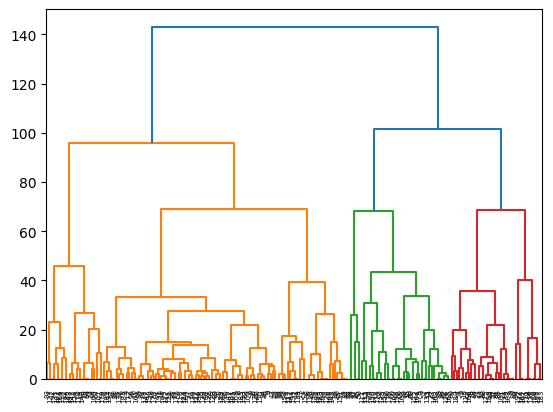

Silhouette Coefficient is 0.4641412770770716
Davies Bouldin index is 0.7246298381983648


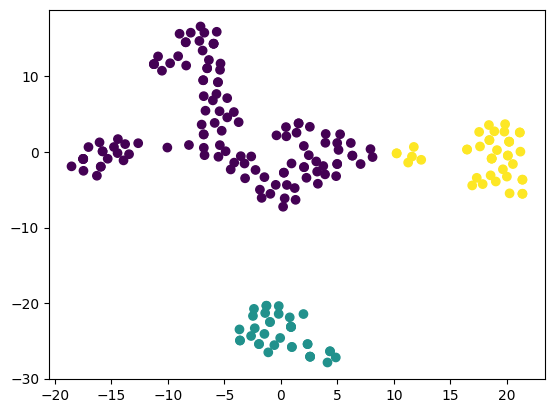

In [ ]:
# For Mall Customers data
import pandas as pd
data = pd.read_csv("Mall_Customers.csv")
data = data.drop(["CustomerID"], axis = 1)

import numpy as np
from sklearn.preprocessing import StandardScaler
data_array = data[["Annual Income (k$)","Spending Score (1-100)"]]
normalizer = StandardScaler()
normalizer.fit(data_array)
data_normalized = data_array

data_normalized = np.array(data_normalized)
new_data = bootstrap_func(data_normalized)
linkage_obj = hierarchy.linkage(new_data, method='complete')
hierarchy.dendrogram(linkage_obj)
plt.show()
hierarchical_clustering = AgglomerativeClustering(n_clusters=3,linkage='complete')
labels = hierarchical_clustering.fit_predict(new_data)
cluster_func_visualization(new_data,labels)
print("Silhouette Coefficient is {}".format(silhouette_score(new_data, labels)))
print("Davies Bouldin index is {}".format(davies_bouldin_score(new_data, labels)))

